# Modelo de Machine Learning - Random Forest 

### Import the libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

### Leitura do dataset 

In [2]:
df = pd.read_csv('../../../../datasets/parte1/dataset_cleaned.csv')

### Criação da variavel que queremos prever 

In [3]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

if 'weight' in df:
    class_weights_dict = df.set_index('RainTomorrow')['weight'].to_dict()

    X.drop(['weight'], axis=1, inplace=True)

### Criação da Random Forest

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

In [5]:
model = None

if 'weight' in df:
    model = RandomForestClassifier(random_state=2023, class_weight=class_weights_dict)

else:
    model = RandomForestClassifier(random_state=2023)

In [6]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    #'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, refit=True, verbose=2, cv=5, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

model = grid_search.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [7]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

### Cálculo das predictions

In [8]:
predictions = model.predict(X_test)

### Accuracy do modelo 

In [9]:
print("%0.2f accuracy" % (accuracy_score(y_test, predictions)))

0.85 accuracy


### Classification Report

In [10]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     32931
           1       0.66      0.66      0.66      9306

    accuracy                           0.85     42237
   macro avg       0.78      0.78      0.78     42237
weighted avg       0.85      0.85      0.85     42237



### Matriz de Confusão

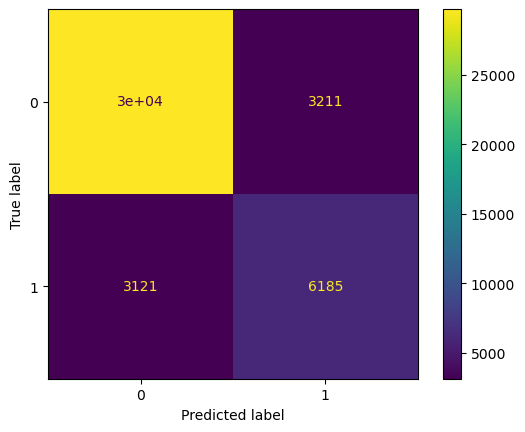

In [11]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions)
plt.show()